In [1]:
import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np
from django.utils import timezone

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *

from django.db.models import Count, Sum

In [2]:
print(f"{Project.objects.count()} projects")

98 projects


In [3]:
users = User.objects.all()

active_users = users.filter(last_login__gt=timezone.now()-timedelta(weeks=4))

print(f"{users.count()} accounts, {active_users.count()} logged in in last 4 weeks")

122 accounts, 32 logged in in last 4 weeks


In [4]:
print(f"{Doc.objects.count():,} documents")

1,902,005 documents


In [5]:
dos = DocOwnership.objects.filter(relevant__in=[1,2,3])

print(f"{dos.count():,} document ratings")

49,770 document ratings


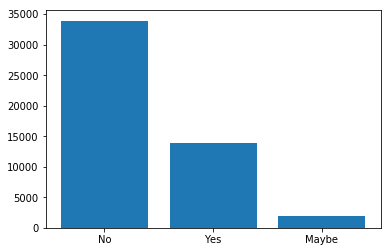

In [6]:
rels = list(dos.values('relevant').annotate(n=Count('pk')).order_by('-n'))

for r in rels: # get the full name of relevance
    r['relevant'] = DocOwnership.Status[r['relevant']][1]    

dodf = pd.DataFrame.from_dict(rels)

fig, ax = plt.subplots()

ax.bar(dodf.index,dodf['n'])
ax.set_xticks(dodf.index)
ax.set_xticklabels(dodf['relevant'])

plt.show()


In [7]:
tms = RunStats.objects.filter(query__isnull=False)
topics = Topic.objects.filter(run_id__in=tms)
terms = Term.objects.filter(run_id__in=tms)

print(f"{tms.count()} topic models run")

print(f"{topics.count():,} topics")

print(f"{terms.count():,} terms")

343 topic models run
18,754 topics
6,371,606 terms


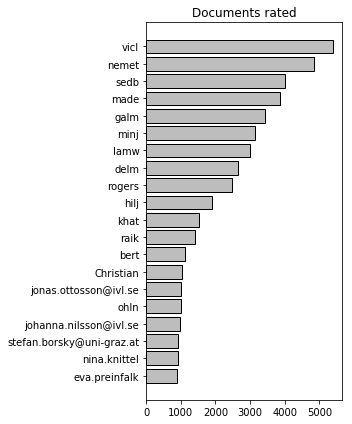

In [30]:
users = DocOwnership.objects.filter(
    relevant__gt=0
).values('user__username').annotate(
    n = Count('pk')
).order_by('-n')[:20]

udf = pd.DataFrame.from_dict(list(users)).sort_values('n').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(5,6))

ax.barh(udf.index,udf['n'],color="#bdbdbd",edgecolor="black")
ax.set_yticks(udf.index)
ax.set_yticklabels(udf['user__username'])

ax.set_title('Documents rated')

plt.tight_layout()

plt.savefig('user_ratings.png')

plt.show()

In [ ]:
users = RunStats.objects.filter(
    relevant__gt=0
).values('user__username').annotate(
    n = Count('pk')
).order_by('-n')[:10]

udf = pd.DataFrame.from_dict(list(users))

fig, ax = plt.subplots(figsize=(7,4))

ax.bar(udf.index,udf['n'])
ax.set_xticks(udf.index)
ax.set_xticklabels(udf['user__username'])

ax.set_title('Documents rated')

plt.savefig('user_ratings.png')

plt.show()